# Jan Izydorczyk
## Sprawozdanie 1

In [21]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
Wersja numpy: 1.20.1
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [22]:
#definicja metody
def foo(bar):
    print(f"Print w metodzie foo: {bar}")
    print(f"typ argumentu {type(bar)}")
    
def typed_foo(bar: str) -> None:
    print(f"Print w metodzie typed_foo: {bar}")
    print(f"typ argumentu {type(bar)}")
    
foo("aa")
typed_foo("aa")
foo(1)
typed_foo(1)

Print w metodzie foo: aa
typ argumentu <class 'str'>
Print w metodzie typed_foo: aa
typ argumentu <class 'str'>
Print w metodzie foo: 1
typ argumentu <class 'int'>
Print w metodzie typed_foo: 1
typ argumentu <class 'int'>


# Zadanie 1

In [3]:
fl = f32
N = 10**7
v = random.uniform(0.1, 0.9)
tab = np.array([v] * N).astype(fl)

In [4]:
def iteration_sum(tab):
    s = fl(0)
    for x in tab:
        s += x
    return s

In [5]:
def print_errors(tab, N, summer, summer_name):
    prec_sum = v * N
    sum_sum = summer(tab)
    error = abs(sum_sum - prec_sum) 
    abs_error = error / prec_sum
    
    print(f'Errors for {summer_name}')
    print(f'Error: {error}')
    print(f'Absolute error: {abs_error}')

### Błędy dla sumowania iteracyjnego

In [6]:
print_errors(tab, N, iteration_sum, 'Iteration method')

Errors for Iteration method
Error: 469465.10757295974
Absolute error: 0.12218596672985911


Błąd względny jest tak duzy, ponieważ akumulator jest coraz większy i zaczyna odstawać od kolejnych sumowanych elementow tablicy  w kontekście rzędów wielkości, co znacząco wpływa na precyzję obliczeń.

In [7]:
def get_abs_error(tab, summer = np.sum, N=N, step=25000, v = v):
    steps = np.array(range(1, N//step + 1)) * step
    abs_errors = [abs(summer(tab[:nextstep]) - nextstep * v) / (nextstep * v) for nextstep in steps]
    return steps, abs_errors 

In [8]:
def make_errors_plot(tab, summer, N=N//10):
    steps, abs_errors = get_abs_error(tab, summer, N)
    fig, ax = plt.subplots()
    #ax.set_title('Blad wzgledny sumowania calej tablicy vs wartosc dokladna')
    ax.set_xlabel('N pierwszych elementow')
    ax.set_ylabel('Blad wzgledny')
    ax.plot(steps, abs_errors)
    fig.show()
    abs_errors

### Wykres zależnosci bledu wzglednego wzgledem rozmiaru tablicy.

c:\users\janek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


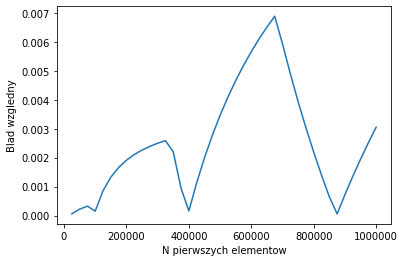

In [9]:
make_errors_plot(tab, iteration_sum)

Błąd względny rośnie dla kolejnych wielkosci tablicy. Wynika to z coraz wiekszych roznic pomiedzy akumulatorem a wartościami tablicy.

In [10]:
def sum_rec(tab, beg =None, end=None):
    if beg is None:
        beg = 0
    if end is None:
        end = len(tab)
    if end - beg > 2:
        mid = (end - beg) // 2
        return sum_rec(tab, beg, beg + mid) +  sum_rec(tab, beg + mid, end)
    if end - beg == 2:
        return tab[beg] + tab[beg + 1]
    return tab[beg]

### Błędy dla sumowania rekurencyjnego

In [11]:
print_errors(tab, N, sum_rec, 'Recursive method')

Errors for Recursive method
Error: 0.10757295973598957
Absolute error: 2.7997620839779657e-08


Bład wzgledny dla tej metody jest znacznie mniejszy. Wynika to  z tego, ze sumujemy elementy w taki sposob, ze sąsiednie sumowane elementy sa tego samego rzedu wielkosci.

### Wykres zależnosci bledu wzglednego wzgledem rozmiaru tablicy.

c:\users\janek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


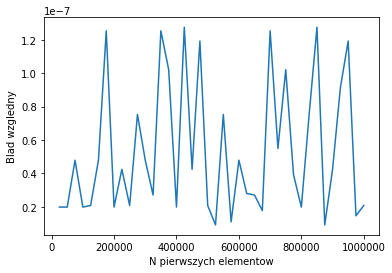

In [12]:
make_errors_plot(tab, sum_rec)

In [13]:
from time import time

def print_times(tab, summer, summer_name):
    start = time()
    summer(tab)
    dt = time() - start
    print(f'Czas wykonywania dla {summer_name} to {dt} sekund')

### Czas dla sumowania iteracyjnego.

In [14]:
print_times(tab, iteration_sum, 'iteracyjnego sumowania')

Czas wykonywania dla iteracyjnego sumowania to 1.0168976783752441 sekund


### Czas dla sumowania rekurencyjnego.

In [15]:
print_times(tab, sum_rec, 'rekurencyjnego sumowania')

Czas wykonywania dla rekurencyjnego sumowania to 5.013684272766113 sekund


Iteracyjna metoda jest znacznie szybsza (co nie dziwi).

# Zadanie 2

In [16]:
def kahan_sum(tab):
    s = fl(0)
    err = fl(0)
    for i in range(len(tab)):
        y = tab[i] - err
        temp = s + y
        err = (temp - s) - y
        s = temp
    return s

### Błędy dla sumowania algorytmu kahana.

In [17]:
print_errors(tab, N, kahan_sum, 'Kahan method')

Errors for Kahan method
Error: 0.10757295973598957
Absolute error: 2.7997620839779657e-08


### Czas dla sumowania kahana.

In [18]:
print_times(tab, kahan_sum, 'kahanowego sumowania')

Czas wykonywania dla kahanowego sumowania to 4.923447847366333 sekund


Zmienna err sprawdza blad przy poszczegolnych sumowaniach akumulatora i uwzglednia to w wyniku.

Czasy dla algorytmu Kahana i rekurencyjnego sumowania sa bardzo porownywalne (moze algorytm Kahana jest minimalnie lepszy).

# Zadanie 3

In [23]:
def dzeta(s, n, reverse=False, fl=f32):
    s=fl(s)
    r = range(n + 1, 0, -1) if reverse else range(1, n + 1)
    acc = fl(0)
    for k in r:
        acc += fl(k)**(-s)
    return acc

In [24]:
def eta(s, n, reverse=False, fl=f32):
    s=fl(s)
    r = range(n + 1, 0, -1) if reverse else range(1, n + 1)
    acc = fl(0)
    for k in r:
        acc += fl(k)**(-s) * (-1)**(k-1)
    return acc

In [21]:
print(dzeta(0.5, 100, False, f32))
print(dzeta(0.5, 100, False, f64))
print(dzeta(0.5, 100, True, f32))
print(dzeta(0.5, 100, True, f64))

18.589603
18.58960382478415
18.689112
18.689107543805147


In [61]:
def table_algos(algos, title):
    ss = (2, 3.66667, 5, 7.2, 10)
    axtitle = ["s = " + str(s) for s in ss]

    fs = (f32, f64)
    flabels = ("f32", "f64") 

    types = (False, True)
    typelabel = ('forward', 'reversed')

    collabel= ("f32_forward", "f32_reversed", "f64_forward", "f64_reversed")

    ns = (50, 100, 200, 500, 1000)
    rowlabel = ["n = " + str(n) for n in ns]

    fig, axs =plt.subplots(len(ss),1, figsize=(7,9))

    for i_s, s in enumerate(ss):
        ax = axs[i_s]
        data = np.ones((len(ns), len(fs) * len(types))) * s
        for i_n in range(len(ns)):
            for i_t in range(len(collabel)):
                data[i_n, i_t] = algos(s, ns[i_n], types[i_t%2], fs[i_t//2])
                # data[i_n] = np.array(list(map(f, data[i_n])))
        ax.axis('tight')
        ax.axis('off')
        ax.title.set_text( axtitle[i_s] )
        the_table = ax.table(cellText=data,colLabels=collabel, rowLabels=rowlabel,loc='center')

    fig.tight_layout(pad=3.0)
    fig.suptitle(title, fontsize=16)
    # axs[1].plot(clust_data[:,0],clust_data[:,1])
    plt.show()

<IPython.core.display.Javascript object>


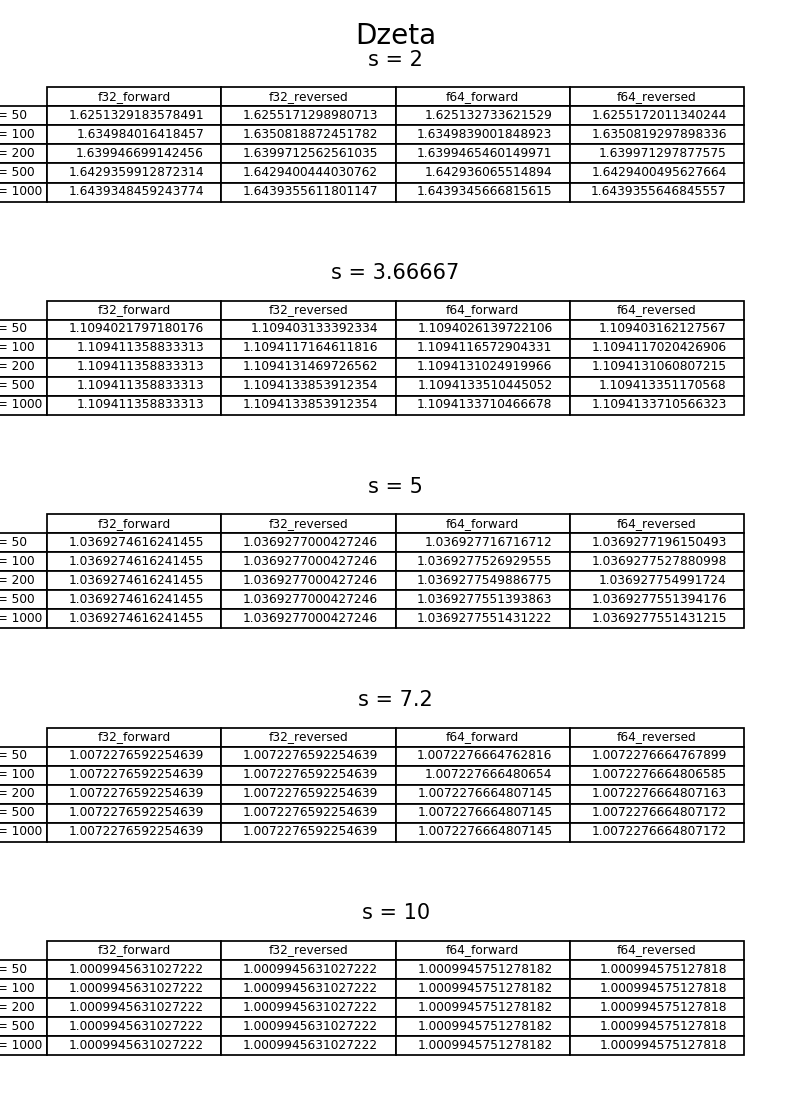

In [62]:
table_algos(dzeta, "Dzeta")

Dla coraz wiekszych $s$ bład obciecia stawał się coraz mniej znaczacy. Kolejne wyrazy ciągu były coraz bardziej zaniedbywalne dla ostatecznego wyniku.

Dla odwroconej sumacji szereg szybiciej zbiegał do granicy (szybciej rósł). Kolejne wyrazy ciagu sa coraz mniejsze, zatem roznica rzedow wielkosci miedzy akumulatorem i kolejnych wyrazow dla prostej sumacji byly coraz wieksze, co doprowadzało do błędów precyzji. Szereg jest ściśle rosnący.

Dla podwójnej precyzji szereg również szybciej zbiegał do granicy. Wieksza dokładność pozwalała na dodatkową akumulację, co sukcesywnie wpływało na ostateczny wynik.

<IPython.core.display.Javascript object>


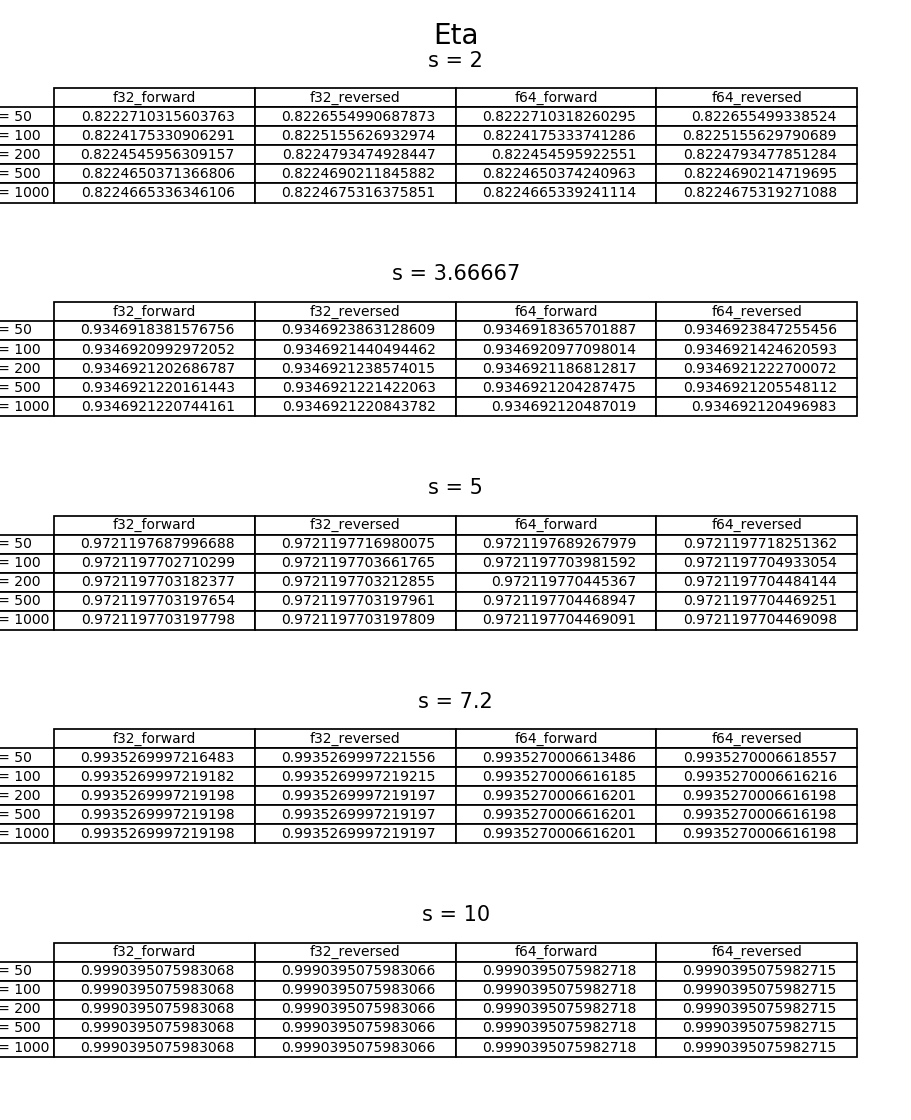

In [63]:
table_algos(eta, "Eta")

# Zadanie 4

Funkckja logistyczna była obliczana dla 2000 iteracji, rysowane było ostatnie 200.

https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

In [70]:
def logistic(r, x, fl=f32):
    return fl(r) * fl(x) * fl(1 - x)

In [111]:
def make_bif(x0=1e-5, n=1000, r_min=1, r_max=4, iterations=2000):
    last = min(100, iterations // 10)
    r = np.linspace(r_min, r_max, n)
    fig, axs = plt.subplots(1, 2, figsize=(9, 6))
    fls = (f32, f64)
    fltitle = ('32', '64')
    for ax, fl, flt in zip(axs, fls, fltitle):
        x = fl(x0) * np.ones(n).astype(fl)

        for i in range(iterations):
            x = logistic(r, x, fl)
            # We display the bifurcation diagram.
            if i >= (iterations - last):
                ax.plot(r, x, ',k', alpha=.1)
        ax.set_xlim(r_min, r_max)
        ax.set_xlabel('R')
        ax.set_title(f"x0={x0}, float{flt}, ")
    fig.suptitle(f'Bifurcation diagram\n{iterations} iterations.', fontsize=12)

    plt.tight_layout(pad=4)

<IPython.core.display.Javascript object>


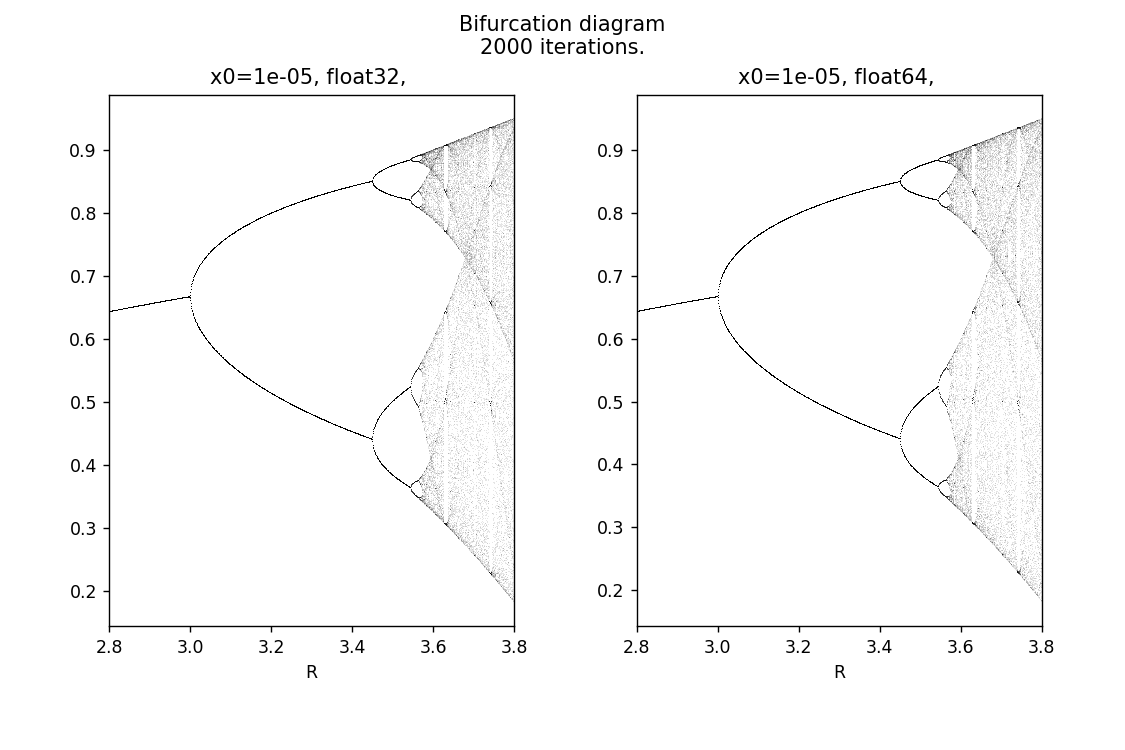

In [112]:
make_bif(1e-5, r_min=2.8, r_max=3.8, iterations=2000)

Dla małych różnic dla $ r $ ciąg potrafi gwałtownie zmienić swoją zbieżność (lub zbiór punktów skupienia). Zadanie jest źle uwarunkowane względem r.

<IPython.core.display.Javascript object>


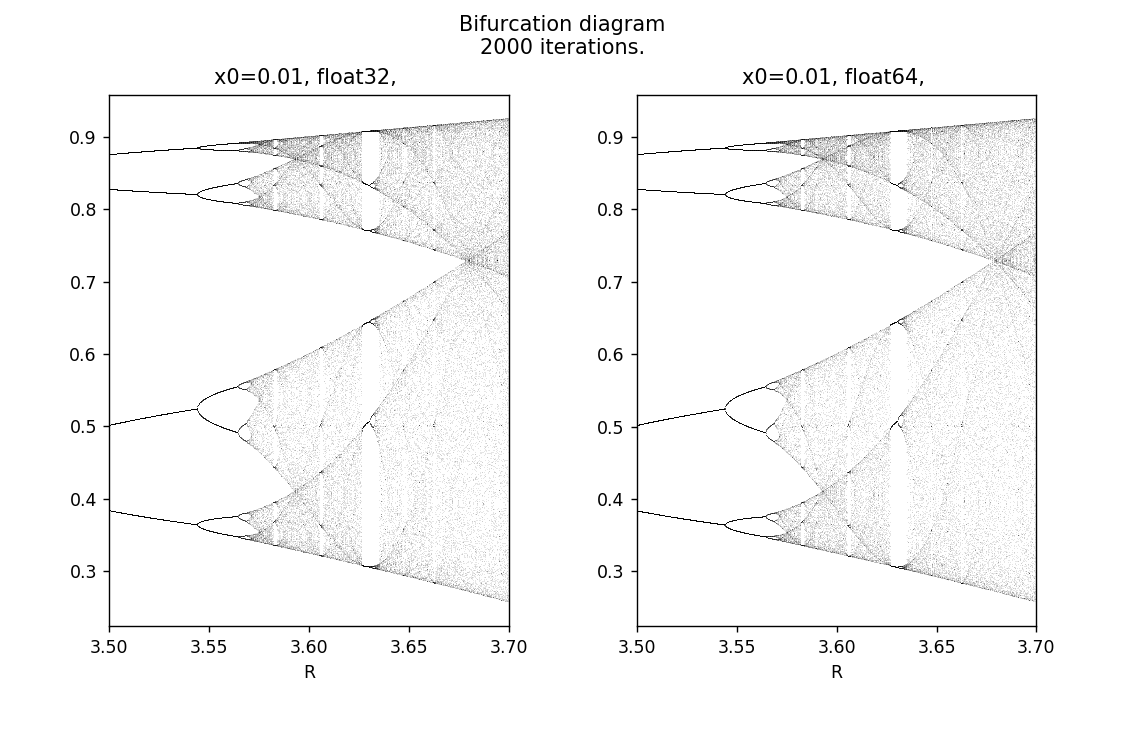

In [113]:
make_bif(1e-2, r_min=3.5, r_max=3.7, iterations=2000)

<IPython.core.display.Javascript object>


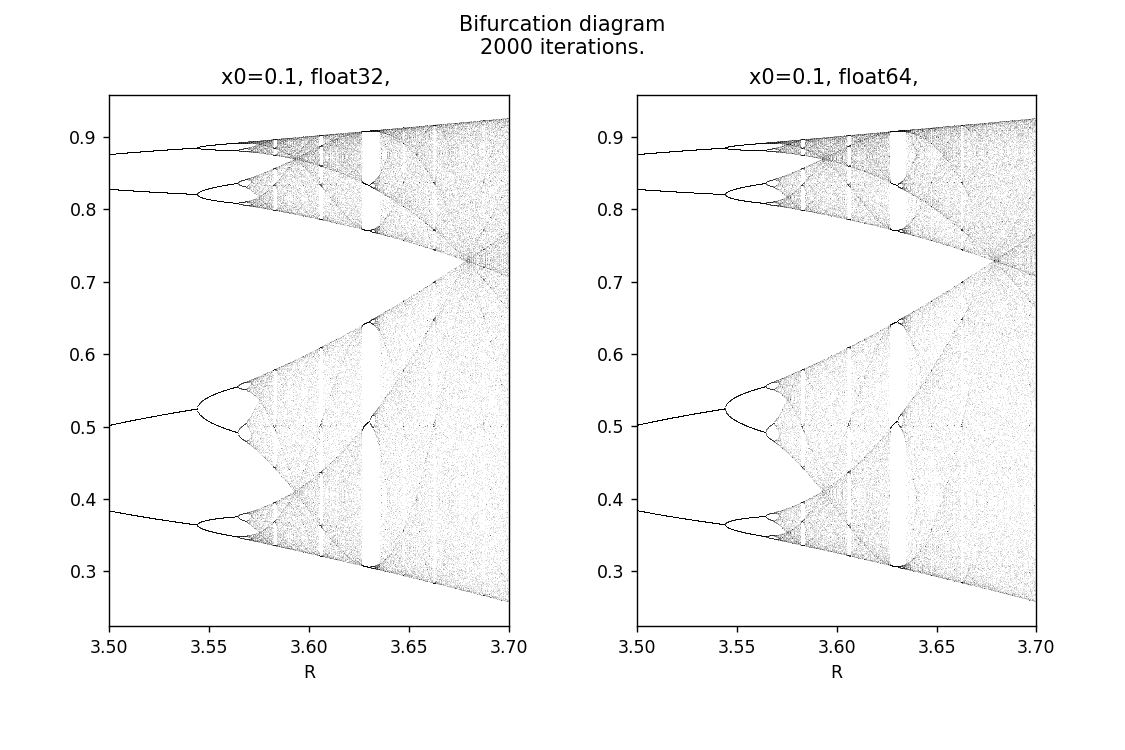

In [114]:
make_bif(1e-1, r_min=3.5, r_max=3.7, iterations=2000)

Wartości początkowe $ x_0 $ wydają się nie wpływać znacząco na ostatezcne punkty skupienia. Zadanie wydaje się być dobrzu uwarunkowane względem $ x_0 $.

Mimo wszystko rozdzielczość wykresu nie pozwala na bardziej szczegółową analizę rozbieżności w  wartościach ciągu.

<IPython.core.display.Javascript object>


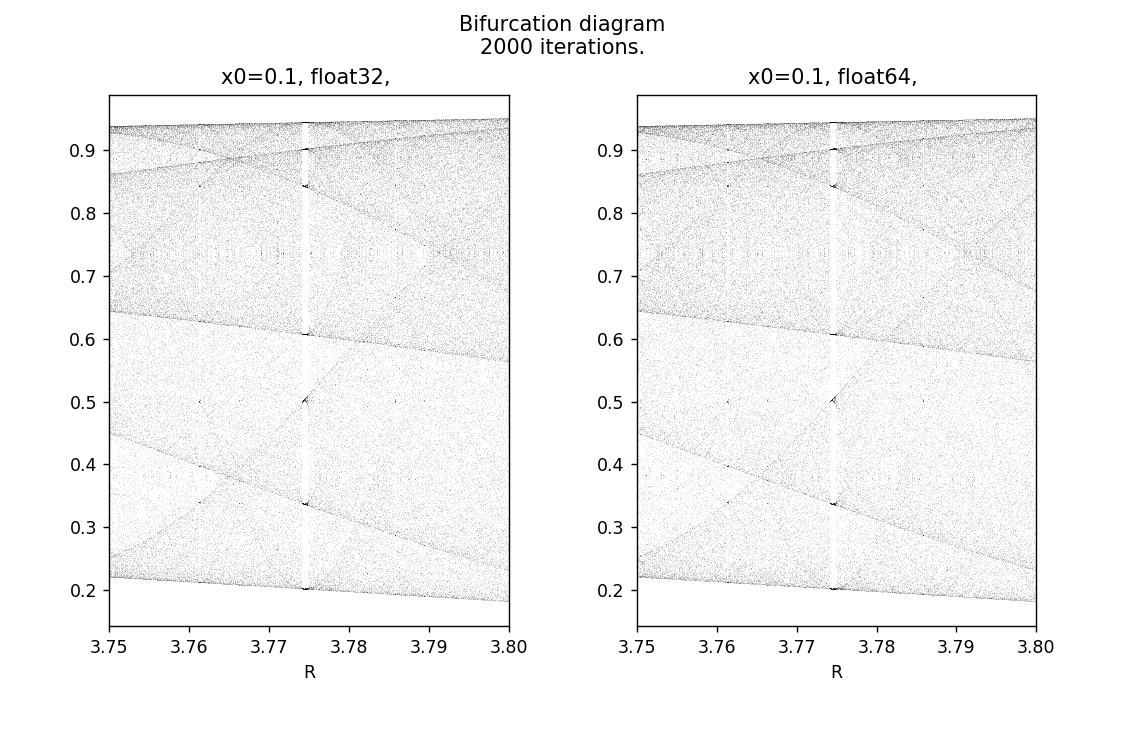

In [115]:
make_bif(1e-1, r_min=3.75, r_max=3.8)

<IPython.core.display.Javascript object>


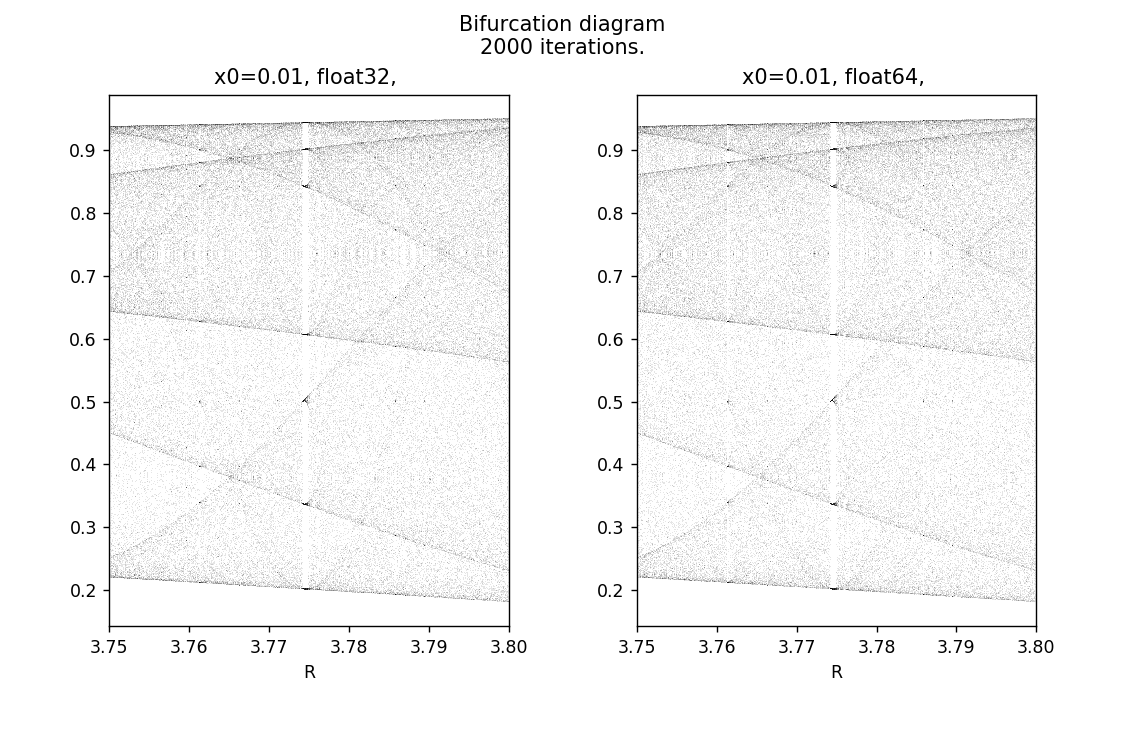

In [116]:
make_bif(1e-2, r_min=3.75, r_max=3.8)

<IPython.core.display.Javascript object>


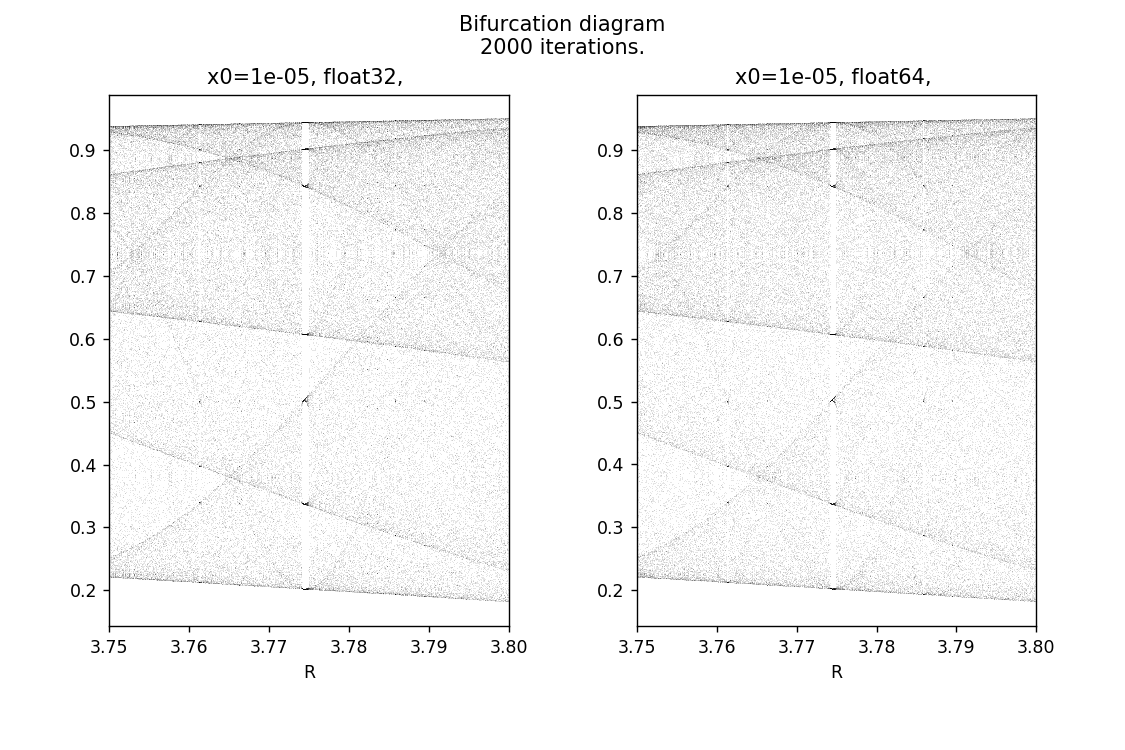

In [117]:
make_bif(1e-5, r_min=3.75, r_max=3.8)

Trajektorie dla róznych warttości $ x_0 $ dla $ r \in [3.75, 3.8] $ nieznacznie się różnią dla poszczególnych reprezentacji floata. Dla tego typu zadan wymagana byłaby znacznie większa preccyzja obliczen, zeby różnice były znaczace. 

In [124]:
r = 4
x_0 = np.linspace(1e-7, 1e-5, 20)
for x in x_0:
    nx = 0
    y = x
    br = False
    limit = 100000
    while y > 0:
        nx += 1
        y = logistic(r, y)
        if nx >= limit:
            br = True
            break
    if not br:
        print(f'Dla x = {x} potrzeba {nx} iteracji.')
    else:
        print(f'Dla x = {x} potrzeba ponad {nx} iteracji.')

Dla x = 1e-07 potrzeba ponad 100000 iteracji.
Dla x = 6.210526315789473e-07 potrzeba ponad 100000 iteracji.
Dla x = 1.1421052631578947e-06 potrzeba ponad 100000 iteracji.
Dla x = 1.663157894736842e-06 potrzeba ponad 100000 iteracji.
Dla x = 2.184210526315789e-06 potrzeba ponad 100000 iteracji.
Dla x = 2.7052631578947364e-06 potrzeba ponad 100000 iteracji.
Dla x = 3.226315789473684e-06 potrzeba ponad 100000 iteracji.
Dla x = 3.7473684210526313e-06 potrzeba 148 iteracji.
Dla x = 4.2684210526315785e-06 potrzeba 200 iteracji.
Dla x = 4.789473684210526e-06 potrzeba ponad 100000 iteracji.
Dla x = 5.310526315789473e-06 potrzeba ponad 100000 iteracji.
Dla x = 5.8315789473684205e-06 potrzeba 2420 iteracji.
Dla x = 6.352631578947368e-06 potrzeba ponad 100000 iteracji.
Dla x = 6.873684210526315e-06 potrzeba ponad 100000 iteracji.
Dla x = 7.394736842105263e-06 potrzeba ponad 100000 iteracji.
Dla x = 7.91578947368421e-06 potrzeba ponad 100000 iteracji.
Dla x = 8.436842105263158e-06 potrzeba ponad 1

Dla różnych warortości $x_0$ ilość potrzebnych operacji okazuje się być znacząco różna. Przy takiej precyzji okazuję się jednak, że zadanie może nie być aż tak dobrze uwarunkowane względem $ x_0 $.